<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/tutoria_5_python_estadistica_g80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

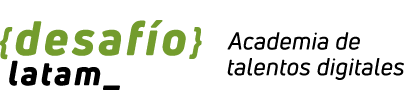

#<center><font color="green">Estadística inferencial</font></center>

##<font color="green">Prueba de hipótesis</font>

Python nos permite determinar fácilmente valores críticos e implementar modelos para pruebas de hipótesis. Veremos a continuación algunos de estos procedimientos para aplicar pruebas de hipótesis sobre una base de datos considerándola una muestra de una población total.


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st ## libreria estadistica de python

# Cargar el conjunto de datos de pingüinos desde Seaborn
pinguins = sns.load_dataset("penguins")
pinguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Utilizaremos los datos sobre diversas medidas corporrales de especies de pingüinos; en particular nos fijaremos en los pingüinos de especie Adelia y su masa corporal.

In [27]:
# Filtrar los datos para obtener solo los pesos de los pingüinos Adelia
adelia = pinguins[pinguins["species"] == "Adelie"]["body_mass_g"]
# Eliminar filas con valores faltantes en los datos de Adelia
adelia = adelia.dropna()
adelia

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
147    3475.0
148    3450.0
149    3750.0
150    3700.0
151    4000.0
Name: body_mass_g, Length: 151, dtype: float64

In [28]:
adelia.info()

<class 'pandas.core.series.Series'>
Index: 151 entries, 0 to 151
Series name: body_mass_g
Non-Null Count  Dtype  
--------------  -----  
151 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [29]:
len(adelia)

151

In [30]:
adelia.describe()

count     151.000000
mean     3700.662252
std       458.566126
min      2850.000000
25%      3350.000000
50%      3700.000000
75%      4000.000000
max      4775.000000
Name: body_mass_g, dtype: float64

Calcularemos, primero, el promedio de las masas de estos pingüinos. Esto nos permitirá poner a prueba algunas hipótesis.

In [31]:
media=np.mean(adelia)
print(media)

3700.662251655629


Vamos a ver ahora qué se obtiene al realizar pruebas t con diferentes medias hipotéticas, para la muestra de pingüinos adelia.

In [34]:
medias = [media - 50, media-1, media+1, media+50, media+3000]

for mu in medias:
  # Realizar una prueba de hipótesis para verificar si el peso de Adelia es igual a mu
  t_stat, p_value = st.ttest_1samp(adelia, mu)
  print(f"Valor t: {t_stat}")
  print(f"Valor p: {p_value}\n")


Valor t: 1.3398510087346298
Valor p: 0.18232003477577144

Valor t: 0.0267970201746926
Valor p: 0.9786572476230542

Valor t: -0.0267970201746926
Valor p: 0.9786572476230542

Valor t: -1.3398510087346298
Valor p: 0.18232003477577144

Valor t: -80.3910605240778
Valor p: 3.136232388747058e-125



El valor de t corresponde a la diferencia entre la media muestral $\overline{x}$ y la media hipotética $\mu$, normalizada dividiendo por el error estándar de la muestra (la desviación estándar de la misma). Dado que la distribución de probabilidad es simétrica, los valores correspondientes a "media-50" y "media+50" presentan valores t iguales en valor absoluto, y valores p iguales. Observamos también que el valor de t aumenta en valor absoluto mientras mayor sea la distancia de la media "hipotética" con la "media muestral", y cuando esto ocurre el valor de p disminuye cada vez más acercándose a cero.


¿Cómo interpretamos esto? Mientras mayor sea la diferencia entre la media hipotética y la media muestral, es cada vez menos probable que la media hipotética sea, efectivamente, la media de la población. ¿Qué probabilidad estamos dispuestos a aceptar? Vamos a **rechazar** la hipótesis nula si el valor de p es menor que el nivel de significancia escogido. Así, en nuestro ejemplo, si asumimos un nivel de significancia igual a 0.1, por ejemplo, tendremos que:

*  No podemos rechazar la hipótesis de que la media poblacional sea "media-50", ya que p = 0.18, que es mayor que 0.1
*  Si podemos rechazar la hipótesis de que la media poblacional sea "media+3000", ya que p = 3.136232388747058e-125, que es menor que 0.1

Podemos observar que nuestra hipótesis alternativa sería "de dos colas", ya que estamos afirmando que la media sería diferente a la supuesta pero no indicamos en qué sentido. Python nos permite considerar esto agregando un parámetro a la función

In [36]:
t_stat, p_value = st.ttest_1samp(adelia, media-1000, alternative='greater')
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}\n")

t_stat, p_value = st.ttest_1samp(adelia, media-100, alternative='greater')
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}\n")

t_stat, p_value = st.ttest_1samp(adelia, media-1, alternative='greater')
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}\n")


t_stat, p_value = st.ttest_1samp(adelia, media+1, alternative='greater')
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}\n")

t_stat, p_value = st.ttest_1samp(adelia, media+10, alternative='greater')
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}\n")

t_stat, p_value = st.ttest_1samp(adelia, media+100, alternative='greater')
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}\n")

t_stat, p_value = st.ttest_1samp(adelia, media+1000, alternative='greater')
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}\n")


Valor t: 26.797020174692598
Valor p: 2.3312641185104634e-59

Valor t: 2.6797020174692596
Valor p: 0.004096100942733048

Valor t: 0.0267970201746926
Valor p: 0.4893286238115271

Valor t: -0.0267970201746926
Valor p: 0.5106713761884729

Valor t: -0.267970201746926
Valor p: 0.6054548015632181

Valor t: -2.6797020174692596
Valor p: 0.995903899057267

Valor t: -26.797020174692598
Valor p: 1.0



"Alternative='greater' indica que nuestra hipótesis alternativa es que la media de la población es mayor que la que estamos suponiendo. Si consideramos un valor **muy menor que** la media poblacional como media hipotética, es muy probable que debamos rechazar dicha hipótesis nula a cambio de la alternativa, que postula que la media es **mayor** que la hipotética. Naturalmente, mientras más nos vayamos acercando a la media real el valor de p irá aumentando. Notarenos que, aun si nuestra media muestral propuesta es menor que la muestral, no podemos descartar la hipótesis nula pues sigue teniendo una alta probabilidad.

¿Qué ocurre cuando comenzamos a tomar valores **mayores que** nuestra media muestral? El valor de p irá aumentando (hasta hacerse 1, o muy cerca de 1). En el último caso, en que hemos tomado una media hipotética igual a "media + 1000", obtenemos un valor de p igual a 1 que nos indicaría... **¡qué no podemos rechazar la hipótesis!** ¿Significa que debemos aceptar, realmente, que esta es la media? En realidad no. Lo que estamos afirmando que la hipótesis alternativa (que la media poblacional sea **mayor que "media+1000"**) es muuuucho menos probable.

Tenemos otras posibilidades, además: "alternative=less" (menor que) y "alternative=two-side" (dos lados) que es la opción por defecto.

<center><strong>¡Ahora podemos regresar a nuestra presentación!</center></strong>

In [ ]:
alternative = 'greater' #mayor que
alternative = 'less' #menor que
alternative = 'two-side' #igual o distinto

##<font color="green">Infiriendo sobre la media - Intervalos de confianza</font>

Considerando la misma muestra anterior, podemos construir un intervalo de confianza para estimar la media poblacional. Utilizaremos un nivel de confianza del 95%.

### Con distribución t



In [23]:
# crear un intervalo de confianza del 95% para el peso medio de la población
st.t.interval(confidence= 0.95, df = len (adelia) -1, loc = media, scale = st.sem (adelia))

(3626.9262422782513, 3774.3982610330067)

Podemos identificar aquí los siguientes parámetros:

*  Confidence=0.95: corresponde al nivel de confianza. Obserza que se da directamente.

*  df=len(data)-1: corresponde al número de grados de libertad para la distribución t. Se calcula restando 1 al número de observaciones en la muestra.

*  loc=media: utilizamos la media de la muestra como estimador para nuestro intervalo de confianza.

*  scale=st.sem(adelia): Se calcula el error estándar de la media (SEM) de la muestra de datos utilizando st.sem(adelia). El error estándar de la media es una medida de la variabilidad de la media muestral y se utiliza para calcular la amplitud del intervalo de confianza.

Calculando el error y definiendo la confiabilidad podemos escribir una afirmación en lenguaje natural:

In [41]:
alpha=0.95
# crear un intervalo de confianza del 95% para el peso medio de la población
limite_inferior , limite_superior =st.t.interval(confidence= alpha, df = len (adelia) -1, loc = media, scale = st.sem (adelia))

error=round(limite_superior-media,2)

media_estimada=round(media,2)

conf=alpha*100

print(f'La media poblacional es {media_estimada}, con un margen de error de {error} y confiabilidad del {conf}%')
print('\n')
print(f'el rango es desde {round(limite_inferior,2)} hasta {round(limite_superior,2)}')

La media poblacional es 3700.66, con un margen de error de 73.74 y confiabilidad del 95.0%


el rango es desde 3626.93 hasta 3774.4


In [42]:
alpha=0.99
# crear un intervalo de confianza del 95% para el peso medio de la población
limite_inferior , limite_superior =st.t.interval(confidence= alpha, df = len (adelia) -1, loc = media, scale = st.sem (adelia))

error=round(limite_superior-media,2)

media_estimada=round(media,2)

conf=alpha*100

print(f'La media poblacional es {media_estimada}, con un margen de error de {error} y confiabilidad del {conf}%')
print('\n')
print(f'el rango es desde {round(limite_inferior,2)} hasta {round(limite_superior,2)}')

La media poblacional es 3700.66, con un margen de error de 97.36 y confiabilidad del 99.0%


el rango es desde 3603.3 hasta 3798.02


In [43]:
alpha=0.9
# crear un intervalo de confianza del 95% para el peso medio de la población
limite_inferior , limite_superior =st.t.interval(confidence= alpha, df = len (adelia) -1, loc = media, scale = st.sem (adelia))

error=round(limite_superior-media,2)

media_estimada=round(media,2)

conf=alpha*100

print(f'La media poblacional es {media_estimada}, con un margen de error de {error} y confiabilidad del {conf}%')
print('\n')
print(f'el rango es desde {round(limite_inferior,2)} hasta {round(limite_superior,2)}')

La media poblacional es 3700.66, con un margen de error de 61.76 y confiabilidad del 90.0%


el rango es desde 3638.9 hasta 3762.43


### Con distribución normal




In [45]:
# crear un intervalo de confianza del 95% para el peso medio de la población
alpha = 0.95
li, ls = st.norm.interval(alpha, loc=media, scale=np.std(adelia))

error_normal = round(ls-media,2)
media_estimada = round(media,2)
conf=alpha*100
print(f'La media poblacional es {media_estimada}, con un margen de error de {error_normal} y confiabilidad del {conf}%')
print('\n')
print(f'el rango es desde {round(li,2)} hasta {round(ls,2)}')

La media poblacional es 3700.66, con un margen de error de 895.79 y confiabilidad del 95.0%


el rango es desde 2804.87 hasta 4596.45


##<font color="green">Infiriendo sobre la proporción</font>

Consideraremos ahora los datos para inferir sobre la proporción de pingüinos machos sobre el total de la población

In [46]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Cargar el conjunto de datos de pingüinos desde Seaborn
pinguins = sns.load_dataset("penguins")

# Filtrar los datos para obtener solo los pingüinos Adelia
adelia = pinguins[pinguins["species"] == "Adelie"]

# Tamaño de la muestra
n = len(adelia)

# Contar la cantidad de machos en la muestra
num_machos = adelia[adelia["sex"] == "Male"]["sex"].count()

# Proporción muestral de machos en la muestra
proporcion_muestral = num_machos / n

print(f'Proporción de machos {100*proporcion_muestral}%')
# Nivel de confianza (por ejemplo, 95%)
confianza = 0.95

# Calcular el intervalo de confianza utilizando statsmodels
intervalo_confianza = sm.stats.proportion_confint(num_machos, n, alpha=1 - confianza)

# Imprimir el resultado
print(f"Intervalo de confianza del {confianza * 100}% para la proporción de machos en la población de pingüinos Adelia:")
print(f"({intervalo_confianza[0]}, {intervalo_confianza[1]})")



Proporción de machos 48.026315789473685%
Intervalo de confianza del 95.0% para la proporción de machos en la población de pingüinos Adelia:
(0.4008380735291567, 0.559688242260317)


<center><strong>¡Ahora podemos regresar a nuestra presentación!</center></strong>

##<font color="green">Prueba de hipótesis para muestras independientes</font>

Compararemos ahora la diferencia en el peso corporal entre las especies de pingüinos "Adelie" y "Chinstrap". La hipótesis nula (H0) sería que no hay diferencia significativa en el peso corporal entre las especies, y la hipótesis alternativa (H1) es que sí hay una diferencia significativa.

In [47]:
import pandas as pd
import seaborn as sns
from scipy import stats

# Cargar el conjunto de datos de pingüinos desde Seaborn
pinguins = sns.load_dataset("penguins")

# Filtrar los datos para obtener los pesos corporales de las especies "Adelie" y "Chinstrap"
adelie = pinguins[pinguins["species"] == "Adelie"]["body_mass_g"]
chinstrap = pinguins[pinguins["species"] == "Chinstrap"]["body_mass_g"]

# Eliminar filas con valores nulos en los datos de peso corporal
adelie = adelie.dropna()
chinstrap = chinstrap.dropna()

# Realizar una prueba de hipótesis (prueba t de muestras independientes)
t_stat, p_value = stats.ttest_ind(adelie, chinstrap, equal_var=False)

# Nivel de significancia (alfa)
alpha = 0.05

# Comprobar si el valor p es menor que alfa para rechazar la hipótesis nula
if p_value < alpha:
    print("Resultado: Se rechaza la hipótesis nula")
else:
    print("Resultado: No se rechaza la hipótesis nula")

# Imprimir el valor t y el valor p
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")



Resultado: No se rechaza la hipótesis nula
Valor t: -0.5430902472363278
Valor p: 0.5878608159584937


<center><strong>¡Ahora podemos regresar a nuestra presentación!</center></strong>

In [ ]:
st.ttest_1samp()  ## estadistico de prueba distribución t (no conocemos la desviasión estandar)
st.t.interval() ## intervalos de confianza con distribución t
st.norm.interval() ## intervalos de confianza con distribución normal
sm.stats.proportion_confint() ## intervalos de confianza para proporciones
st.ttest_ind()  #pruebas de hipotesis para muestras independientes

In [48]:
pinguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [50]:
datos = pinguins['flipper_length_mm']
datos = datos.dropna()
len(datos)

342

In [53]:
def prueba_hipotesis(df,variable,mu,colas,alpha,cantidad_muestra):
  datos = df[variable]
  datos = datos.dropna()
  muestra = np.random.choice(datos, cantidad_muestra)

  t, p = st.ttest_1samp(muestra,mu, alternative=colas)

  if p < alpha:
    if colas == 'two-sided':
      print(f'Con una confianza de {round(100*(1-alpha),2)}% se rechaza la hipotesis de la media, es distina')
    elif colas == 'greater':
      print(f'Con una confianza de {round(100*(1-alpha),2)}% se rechaza la hipotesis de la media, es mayor que la media')
    elif colas == 'less':
      print(f'Con una confianza de {round(100*(1-alpha),2)}% se rechaza la hipotesis de la media, es menor que la media')
  else:
    print(f'Con una confianza de {round(100*(1-alpha),2)}% se acepta la hipotesis de la media')

  print(f'valor de t: {t} y valor: {p}')


media_poblacional = pinguins['flipper_length_mm'].dropna().mean()

prueba_hipotesis(pinguins,'flipper_length_mm',media_poblacional,'two-sided',0.05,200)


Con una confianza de 95.0% se acepta la hipotesis de la media
valor de t: 0.5592983878746778 y valor: 0.5765870053653012
